# Customer Churn Prediction & Analysis Code

# Import Libraries

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from function import visualize_column as dv

# Data Loading & Exploration

In [ ]:
# Load Data
Verizon_data = 'Telco_Churn_Data.csv'

df = pd.read_csv(Verizon_data)

# Peak at the data
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Observations:
- many binary features
- some numeric features

Now, let's look at some statistics about the data

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Get statistics for columns
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7042,7040,7042,7041,...,7041,7041,7040,7043,7041,7042,7041,7042.000000,7042,7042
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,4,2,4,NaN,6530,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6360,3388,3095,3498,...,3094,3472,2808,2785,3870,4170,2364,NaN,11,5173
mean,NaN,NaN,0.162147,NaN,NaN,32.683516,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.756774,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,28.998589,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.089352,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,-50.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# Data Cleaning

In [ ]:
# Checking for null values
df.isnull().values.any()

True

Addressing missing values

In [ ]:
# Checking what columns are missing values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        1
MultipleLines       3
InternetService     1
OnlineSecurity      2
OnlineBackup        0
DeviceProtection    2
TechSupport         2
StreamingTV         3
StreamingMovies     0
Contract            2
PaperlessBilling    1
PaymentMethod       2
MonthlyCharges      1
TotalCharges        1
Churn               1
dtype: int64

In [ ]:
# Finding indicies with missing values an drop them
bool_df = df.isnull()
row_has_nan = bool_df.any (axis=1)
rows_with_nan = df[row_has_nan].index

df = df.drop(df.index[rows_with_nan])

In [ ]:
# Checking results of previous code
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data encoding

In [ ]:
# Testing what one hot encoding each column will do...we get over 10,000 columns
pd.get_dummies(df).shape

(7033, 13601)

In [ ]:
# Some features have data that can be presented in a binary way

# Define mapping dictionaries
yes_no_mapping = {'No phone service': 'No', 'No internet service': 'No', 'DSL': 'Yes', 'Fiber optic': 'Yes'}
automatic_payment_mapping = {'Bank transfer (automatic)': 'Yes', 'Credit card (automatic)': 'Yes',
                             'Electronic check': 'No', 'Mailed check': 'No'}

# Columns to replace
columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 'InternetService', 'PaymentMethod']

# Apply mapping to the specified columns
df[columns_to_replace] = df[columns_to_replace].replace(yes_no_mapping)
df['AutomaticPayment'] = df['PaymentMethod'].replace(automatic_payment_mapping)

# Drop the original 'PaymentMethod' column
df.drop('PaymentMethod', axis=1, inplace=True)


In [ ]:
# Now convert all values to binary

# Define mapping dictionaries
binary_mapping = {'Yes': 1, 'No': 0}

# Columns to replace
binary_columns_to_replace = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                             'InternetService', 'PaperlessBilling', 'AutomaticPayment', 'Churn']

# Apply mapping to the specified columns
df[binary_columns_to_replace] = df[binary_columns_to_replace].replace(binary_mapping)

#Special treatment for gender
gender_mapping = {'Male': 1, 'Female': 0}
df['gender'] = df['gender'].replace(gender_mapping)

In [ ]:
# Checking how our data types look
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
AutomaticPayment      int64
dtype: object

# Data Preperation

In [ ]:
# Checking how many unique values in column
unique_values = df['Contract'].unique()
value_counts = df['Contract'].value_counts()

print(unique_values, value_counts)

['Month-to-month' 'One year' 'Two year' '1'] Contract
Month-to-month    3864
Two year          1693
One year          1472
1                    4
Name: count, dtype: int64


In [ ]:
#Group 1 and "One year" together
df['Contract'] = df['Contract'].replace({"1": "One year"})

In [ ]:
# one hot encoding columns
df = pd.get_dummies(df, columns=['Contract'])
df.shape

(7033, 23)

In [ ]:
# Checking new dtypes!
df.dtypes

customerID                  object
gender                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
PaperlessBilling             int64
MonthlyCharges             float64
TotalCharges                object
Churn                        int64
AutomaticPayment             int64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
dtype: object

Addressing numeric features

In [ ]:
# inspecting tenure
unique_values = df['tenure'].unique()
value_counts = df['tenure'].value_counts()

print(unique_values, value_counts)

[   1   34    2   45    8   22   10   28   62   13   16   58   49   25
   69   52   71   21   12   30   47   72   17   27    5   46   11   70
   63   43   15   60   18   66    9    3   31   50   64   56    7   42
   35   48   29   65   38   68   32   55   37   36   41    6    4   33
   67   23   57   61   14   20   53   40   59   24   44   19   54   51
   26    0   39 1000  300  -50  500  700] tenure
 1       613
 72      361
 2       237
 3       200
 4       174
        ... 
 1000      1
 300       1
-50        1
 500       1
 700       1
Name: count, Length: 78, dtype: int64


In [ ]:
# Statistics on Total Charges
maximum_T = df['tenure'].max()
minimum_T = df['tenure'].min()
data_range_T = maximum_T - minimum_T
average_T = df['tenure'].mean()
std_deviation_T = df['tenure'].std()
print(f"Maximum: {maximum_T}")
print(f"Minimum: {minimum_T}")
print(f"Range: {data_range_T}")
print(f"Average: {average_T}")
print(f"Standard Deviation: {std_deviation_T}")

Maximum: 1000
Minimum: -50
Range: 1050
Average: 32.69202331864069
Standard Deviation: 29.00777847338151


-50 doesn't seem like a possible value, and 1000 is significantly higher than the average. Let's examine the datapoints on a graph

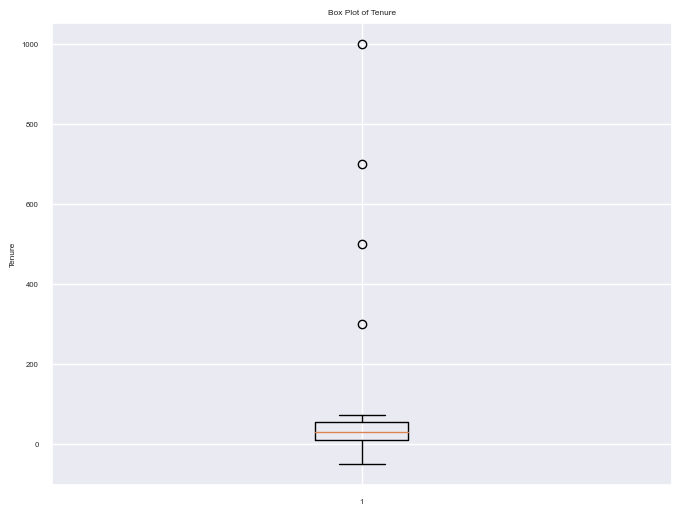

In [ ]:

# Plotting the box plot for 'tenure'
plt.figure(figsize=(8, 6))
plt.boxplot(df['tenure'])
plt.title('Box Plot of Tenure')
plt.ylabel('Tenure')
plt.show()


In [ ]:
# Checking how many columns arebelow 0
selected_rows = df[df['tenure'] < 0]
selected_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,AutomaticPayment,Contract_Month-to-month,Contract_One year,Contract_Two year
4588,2105-PHWON,0,0,1,0,-50,1,1,1,0,...,0,1,1,95.0,3008.15,0,1,True,False,False


In [ ]:
# Checking how many columns are higher than 120
threshold = 200
selected_rows = df[df['tenure'] > threshold]
selected_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,AutomaticPayment,Contract_Month-to-month,Contract_One year,Contract_Two year
1482,9290-SHCMB,0,1,0,0,1000,1,0,1,0,...,1,1,1,96.85,1235.55,0,0,True,False,False
1604,6265-SXWBU,1,0,1,1,300,1,1,1,0,...,1,0,0,95.75,6511.25,0,1,False,True,False
4612,6723-CEGQI,0,0,0,1,500,0,0,1,0,...,1,0,0,45.25,2933.95,0,0,False,False,True
5904,9402-CXWPL,0,0,0,0,700,1,1,1,0,...,1,1,0,98.90,6838.6,0,0,False,True,False


In [ ]:
lower_limit = 0
upper_limit = 200

# Identify outliers
outliers = (df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)

# Replace outliers with the average
average_tenure = df.loc[~outliers, 'tenure'].mean()
df.loc[outliers, 'tenure'] = average_tenure


/var/folders/xg/p3q3yztd1tzgf72581g38x4h0000gn/T/ipykernel_81001/2079559529.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '32.366676152532726' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers, 'tenure'] = average_tenure


In [ ]:
# Check the new values
outlier_rows = df[outliers]
print(outlier_rows)


      customerID  gender  SeniorCitizen  Partner  Dependents     tenure  \
1482  9290-SHCMB       0              1        0           0  32.366676   
1604  6265-SXWBU       1              0        1           1  32.366676   
4588  2105-PHWON       0              0        1           0  32.366676   
4612  6723-CEGQI       0              0        0           1  32.366676   
5904  9402-CXWPL       0              0        0           0  32.366676   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
1482             1              0                1               0  ...   
1604             1              1                1               0  ...   
4588             1              1                1               0  ...   
4612             0              0                1               0  ...   
5904             1              1                1               0  ...   

      StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
1482            1         

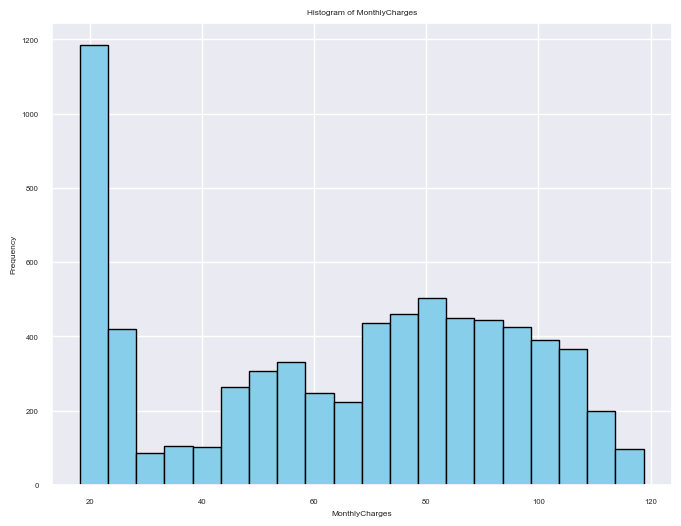

In [ ]:
dv(df, 'MonthlyCharges')

In [ ]:
# Inspecting monthly charges
unique_values = df['MonthlyCharges'].unique()
value_counts = df['MonthlyCharges'].value_counts()

print(unique_values, value_counts)

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] MonthlyCharges
20.05     61
19.90     44
19.95     44
19.85     44
19.70     43
          ..
23.65      1
114.70     1
87.80      1
43.65      1
78.70      1
Name: count, Length: 1585, dtype: int64


In [ ]:
# Statistics on Monthly Charges
maximum_MC = df['MonthlyCharges'].max()
minimum_MC = df['MonthlyCharges'].min()
data_range_MC = maximum_MC - minimum_MC
average_MC = df['MonthlyCharges'].mean()
std_deviation_MC = df['MonthlyCharges'].std()
print(f"Maximum: {maximum_MC}")
print(f"Minimum: {minimum_MC}")
print(f"Range: {data_range_MC}")
print(f"Average: {average_MC}")
print(f"Standard Deviation: {std_deviation_MC}")

Maximum: 118.75
Minimum: 18.25
Range: 100.5
Average: 64.76227072373098
Standard Deviation: 30.089196044052716


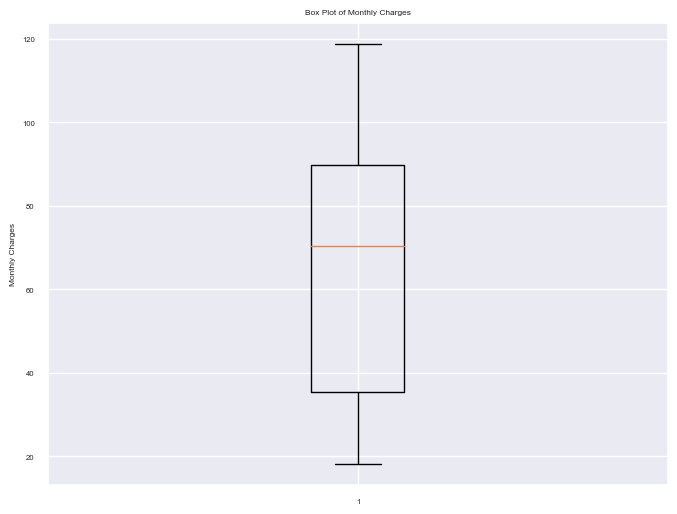

In [ ]:
# Plotting the box plot for 'tenure'
plt.figure(figsize=(8, 6))
plt.boxplot(df['MonthlyCharges'])
plt.title('Box Plot of Monthly Charges')
plt.ylabel('Monthly Charges')
plt.show()

In [ ]:
# Convert 'totalcharges' column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
mean_totalcharges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_totalcharges, inplace=True)

# Convert the 'totalcharges' column to integers
df['TotalCharges'] = df['TotalCharges'].astype(int)


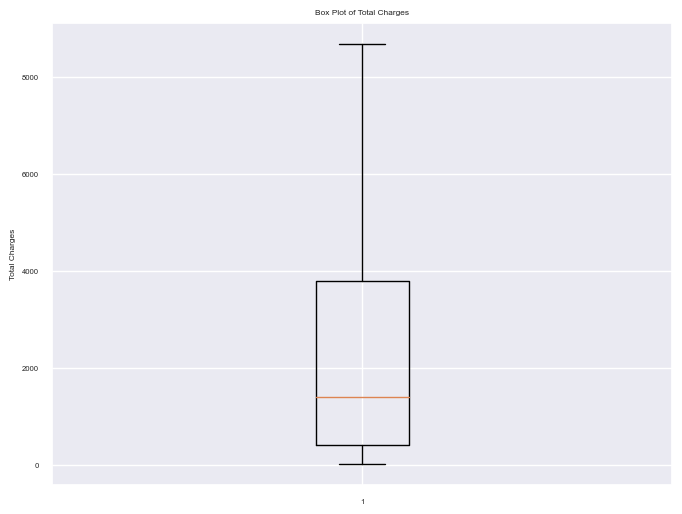

In [ ]:
# Plotting the box plot for 'tenure'
plt.figure(figsize=(8, 6))
plt.boxplot(df['TotalCharges'])
plt.title('Box Plot of Total Charges')
plt.ylabel('Total Charges')
plt.show()

In [ ]:
# Statistics on Total Charges (Had to comment out some of the code because of errors)
maximum_TC = df['TotalCharges'].max()
minimum_TC = df['TotalCharges'].min()
data_range_TC = maximum_TC - minimum_TC
average_TC = df['TotalCharges'].mean()
std_deviation_TC = df['TotalCharges'].std()
print(f"Maximum: {maximum_TC}")
print(f"Minimum: {minimum_TC}")
print(f"Range: {data_range_TC}")
print(f"Average: {average_TC}")
print(f"Standard Deviation: {std_deviation_TC}")

Maximum: 8684
Minimum: 18
Range: 8666
Average: 2283.652779752595
Standard Deviation: 2265.1960621446556


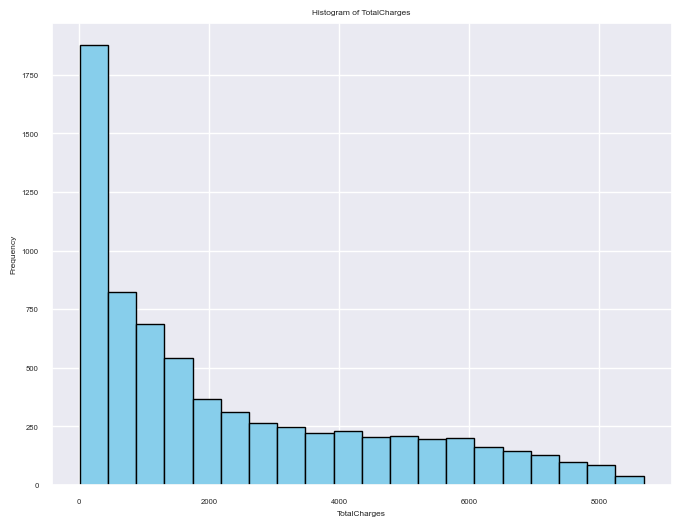

In [ ]:
dv(df, 'TotalCharges')

In [ ]:
# scaling TotalCharges
TotalCharges_min = 18
TotalCharges_max = 4000
scaler = MinMaxScaler(feature_range=(TotalCharges_min, TotalCharges_max))

df['scaledTotalCharges'] = scaler.fit_transform(df[['TotalCharges']])

print("Original Total charges:")
print(df['TotalCharges'])

print("\nScaled Total charges:")
print(df['scaledTotalCharges'])

Original Total charges:
0         29
1       1889
2        108
3       1840
4        151
        ... 
7038    1990
7039    7362
7040     346
7041     306
7042    6844
Name: TotalCharges, Length: 7033, dtype: int64

Scaled Total charges:
0         23.054466
1        877.718671
2         59.354720
3        855.203323
4         79.113086
           ...     
7038     924.127856
7039    3392.545119
7040     168.714978
7041     150.335103
7042    3154.525733
Name: scaledTotalCharges, Length: 7033, dtype: float64


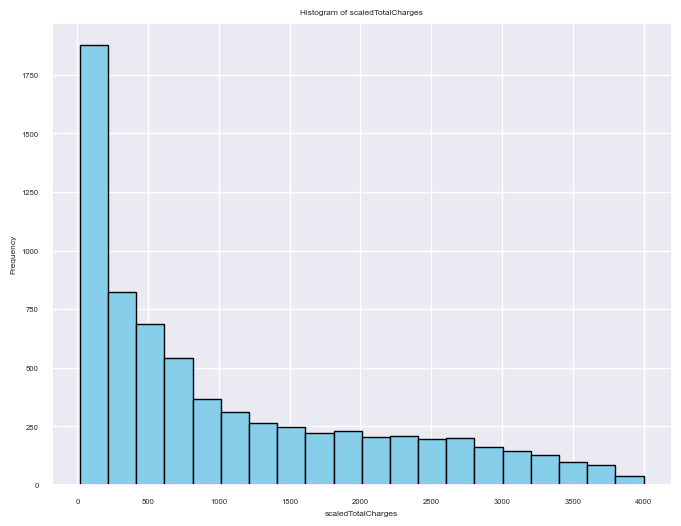

In [ ]:
dv(df, 'scaledTotalCharges')

In [ ]:
# Statistics on Scaled Total Charges
maximum_ScaledTC = df['scaledTotalCharges'].max()
minimum_ScaledTC = df['scaledTotalCharges'].min()
data_range_ScaledTC = maximum_ScaledTC - minimum_ScaledTC
average_ScaledTC = df['scaledTotalCharges'].mean()
std_deviation_ScaledTC = df['scaledTotalCharges'].std()
print(f"Maximum: {maximum_ScaledTC}")
print(f"Minimum: {minimum_ScaledTC}")
print(f"Range: {data_range_ScaledTC}")
print(f"Average: {average_ScaledTC}")
print(f"Standard Deviation: {std_deviation_ScaledTC}")

Maximum: 4000.0000000000005
Minimum: 18.0
Range: 3982.0000000000005
Average: 1059.0603933735094
Standard Deviation: 1040.8505330556218


In [ ]:
TotalCharges_Stats = df[['TotalCharges', 'scaledTotalCharges']].describe()
TotalCharges_Stats

,TotalCharges,scaledTotalCharges
count,7033.000000,7033.000000
mean,2283.652780,1059.060393
std,2265.196062,1040.850533
min,18.000000,18.000000
25%,401.000000,193.987307
50%,1400.000000,653.024694
75%,3791.000000,1751.681745
max,8684.000000,4000.000000


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'AutomaticPayment', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'scaledTotalCharges'],
      dtype='object')

In [ ]:
# Reordering the df to follow data matrix conventions
new_order_DM = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies',  'PaperlessBilling', 'MonthlyCharges','Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year',  'AutomaticPayment',
       'scaledTotalCharges', 'Churn']
df_cleansed = df[new_order_DM]
df_cleansed.dtypes

gender                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                     float64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
PaperlessBilling             int64
MonthlyCharges             float64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
AutomaticPayment             int64
scaledTotalCharges         float64
Churn                        int64
dtype: object

In [ ]:
# Columns to convert to booleans
columns_to_convert = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'AutomaticPayment', 'Churn']

# Convert selected columns to booleans
df_cleansed[columns_to_convert] = df_cleansed[columns_to_convert].astype(bool)
df_cleansed.dtypes

/var/folders/xg/p3q3yztd1tzgf72581g38x4h0000gn/T/ipykernel_81001/3331735005.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed[columns_to_convert] = df_cleansed[columns_to_convert].astype(bool)


gender                        bool
SeniorCitizen                 bool
Partner                       bool
Dependents                    bool
tenure                     float64
PhoneService                  bool
MultipleLines                 bool
InternetService               bool
OnlineSecurity                bool
OnlineBackup                  bool
DeviceProtection              bool
TechSupport                   bool
StreamingTV                   bool
StreamingMovies               bool
PaperlessBilling              bool
MonthlyCharges             float64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
AutomaticPayment              bool
scaledTotalCharges         float64
Churn                         bool
dtype: object

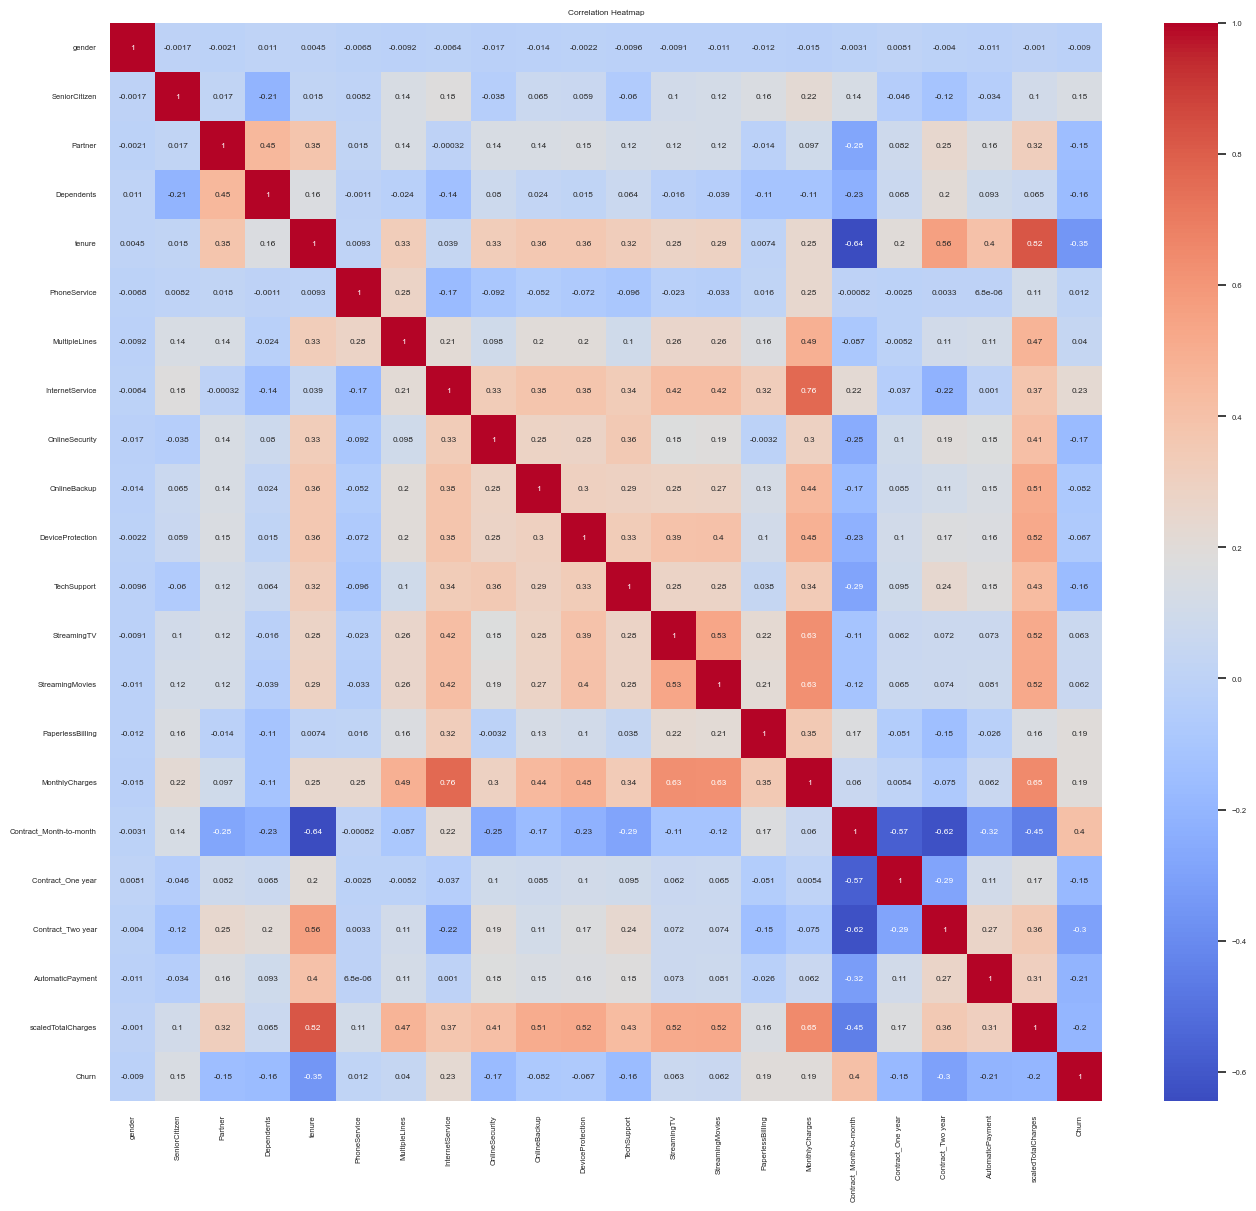

In [ ]:
# Heatmap before feature engineering
plt.figure(figsize=(16, 14))
correlation_matrix = df_cleansed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [ ]:
# Combining the 'Contract' columns into a single feature with the contract names
df_cleansed['ContractType'] = df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']].idxmax(axis=1)

# Replacing the contract names with 0, 1, and 2
df_cleansed['ContractType'].replace({
    'Contract_Month-to-month': 0,
    'Contract_One year': 1,
    'Contract_Two year': 1
}, inplace=True)

print(df_cleansed[['ContractType']])

      ContractType
0                0
1                1
2                0
3                1
4                0
...            ...
7038             1
7039             1
7040             0
7041             0
7042             1

[7033 rows x 1 columns]


/var/folders/xg/p3q3yztd1tzgf72581g38x4h0000gn/T/ipykernel_81001/2358405184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['ContractType'] = df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']].idxmax(axis=1)
/var/folders/xg/p3q3yztd1tzgf72581g38x4h0000gn/T/ipykernel_81001/2358405184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['ContractType'].replace({


In [ ]:
# Converting selected columns to booleans
df_cleansed['ContractType'] = df_cleansed['ContractType'].astype(bool)
df_cleansed.dtypes

/var/folders/xg/p3q3yztd1tzgf72581g38x4h0000gn/T/ipykernel_81001/609760718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['ContractType'] = df_cleansed['ContractType'].astype(bool)


gender                        bool
SeniorCitizen                 bool
Partner                       bool
Dependents                    bool
tenure                     float64
PhoneService                  bool
MultipleLines                 bool
InternetService               bool
OnlineSecurity                bool
OnlineBackup                  bool
DeviceProtection              bool
TechSupport                   bool
StreamingTV                   bool
StreamingMovies               bool
PaperlessBilling              bool
MonthlyCharges             float64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
AutomaticPayment              bool
scaledTotalCharges         float64
Churn                         bool
ContractType                  bool
dtype: object

In [ ]:
# Combining 'Partner' and 'Dependents' into a single feature that indicates if a customer has any family ties.

# Creates the 'FamilyTies' column
df_cleansed['FamilyTies'] = (df_cleansed['Dependents'] == 1) & (df_cleansed['Partner'] == 1)

# Converts the result to 1 for True and 0 for False
df_cleansed['FamilyTies'] = df_cleansed['FamilyTies'].astype(bool)
df_cleansed.dtypes

gender                        bool
SeniorCitizen                 bool
Partner                       bool
Dependents                    bool
tenure                     float64
PhoneService                  bool
MultipleLines                 bool
InternetService               bool
OnlineSecurity                bool
OnlineBackup                  bool
DeviceProtection              bool
TechSupport                   bool
StreamingTV                   bool
StreamingMovies               bool
PaperlessBilling              bool
MonthlyCharges             float64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
AutomaticPayment              bool
scaledTotalCharges         float64
Churn                         bool
ContractType                  bool
FamilyTies                    bool
dtype: object

In [ ]:
print(df_cleansed['AutomaticPayment'])

0       False
1       False
2       False
3        True
4       False
        ...  
7038    False
7039     True
7040    False
7041    False
7042     True
Name: AutomaticPayment, Length: 7033, dtype: bool


In [ ]:
# Reordering the df to follow data matrix conventions
neworderDM = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling','AutomaticPayment',
       'scaledTotalCharges', 'ContractType', 'FamilyTies', 'Churn']

df_cleansed = df_cleansed[neworderDM]
df_cleansed.dtypes

gender                        bool
SeniorCitizen                 bool
Partner                       bool
Dependents                    bool
tenure                     float64
PhoneService                  bool
MultipleLines                 bool
InternetService               bool
OnlineSecurity                bool
OnlineBackup                  bool
DeviceProtection              bool
TechSupport                   bool
StreamingTV                   bool
StreamingMovies               bool
MonthlyCharges             float64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
PaperlessBilling              bool
AutomaticPayment              bool
scaledTotalCharges         float64
ContractType                  bool
FamilyTies                    bool
Churn                         bool
dtype: object

In [ ]:
# Remove the features we binned
columns_to_delete = ['Partner', 'Dependents', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
df_cleansed.drop(columns=columns_to_delete, inplace=True)

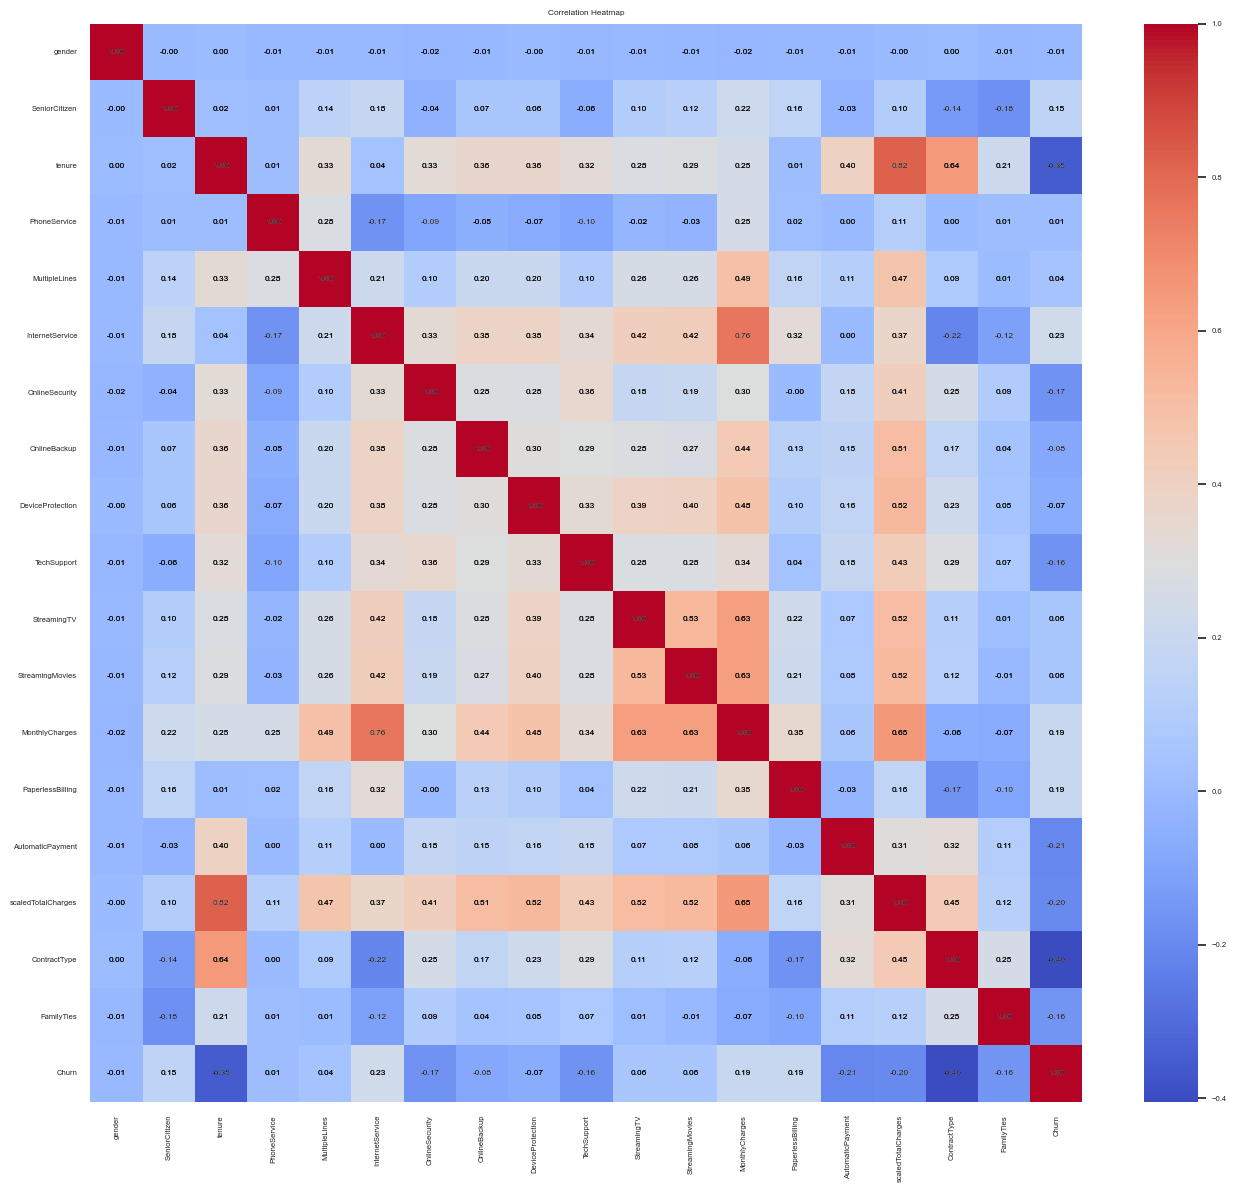

In [ ]:
# plt.tight_layout()
plt.figure(figsize=(16, 14))
correlation_matrix = df_cleansed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

plt.show()

# MODELING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc, log_loss
)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [ ]:
#get features for training the model
feature_list = df_cleansed.columns[:-1]
print(feature_list)

Index(['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges',
       'PaperlessBilling', 'AutomaticPayment', 'scaledTotalCharges',
       'ContractType', 'FamilyTies'],
      dtype='object')


In [ ]:
y = df_cleansed['Churn']
X = df_cleansed[feature_list]

In [ ]:
# Split thee data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1234)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4712, 18)
(2321, 18)


## Logistic Regression

Confusion Matrix:
[[1513  197]
 [ 264  347]]
Log Loss: 0.4184018164186014
Accuracy Score: 0.8013787160706592
Precision: 0.6378676470588235
Recall: 0.5679214402618658
F1-Score: 0.6008658008658009
ROC AUC: 0.8437132110144427


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


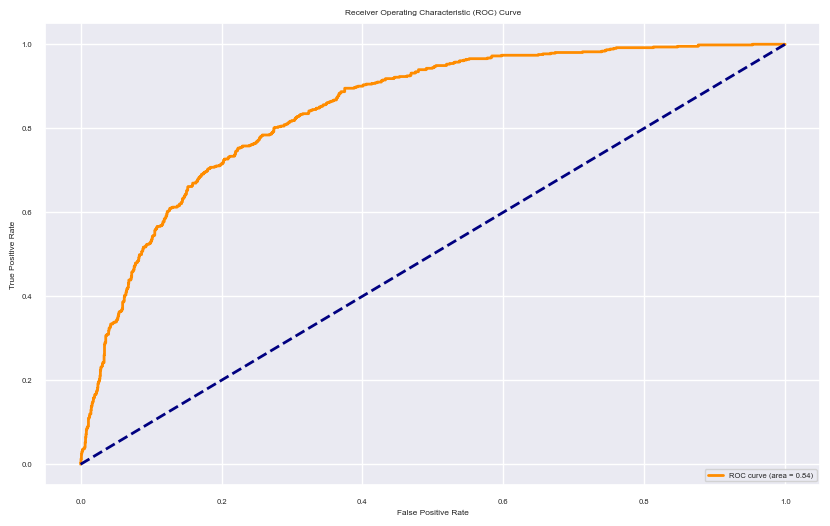

In [ ]:
# Function to train and test Logistic Regression
def train_test_LR(X_train, y_train, X_test, y_test, c=1):

    # Creating the scikit-learn LogisticRegression model
    modelLR = LogisticRegression(C=c)

    # Fiting the model
    modelLR.fit(X_train, y_train)

    # Making predictions
    churn_predictions = modelLR.predict(X_test)

    # Computing the confusion matrix
    cm = confusion_matrix(y_test, churn_predictions)

    # Makeing predictions on the test data
    probability_predictions = modelLR.predict_proba(X_test)[:, 1]

    # Computing the log loss
    l_loss = log_loss(y_test, probability_predictions)

    # Computing the accuracy score
    acc_score = accuracy_score(y_test, churn_predictions)

    # Computing ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, probability_predictions)
    roc_auc = auc(fpr, tpr)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_test, churn_predictions)
    recall = recall_score(y_test, churn_predictions)
    f1 = f1_score(y_test, churn_predictions)

    # Print metrics
    print(f"Confusion Matrix:\n{cm}")
    print(f"Log Loss: {l_loss}")
    print(f"Accuracy Score: {acc_score}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC AUC: {roc_auc}")

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return cm, l_loss, acc_score, precision, recall, f1

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train and test Logistic Regression with ROC curve
cm, l_loss, acc_score, precision, recall, f1 = train_test_LR(X_train, y_train, X_test, y_test, c=1)

## Random Forest

Max Depth: 10, N Estimators: 20
Accuracy: 0.8031021111589832
Precision: 0.654
Recall: 0.5351882160392799
F1-Score: 0.5886588658865887
ROC AUC: 0.7170093126980026
[[1537  173]
 [ 284  327]]


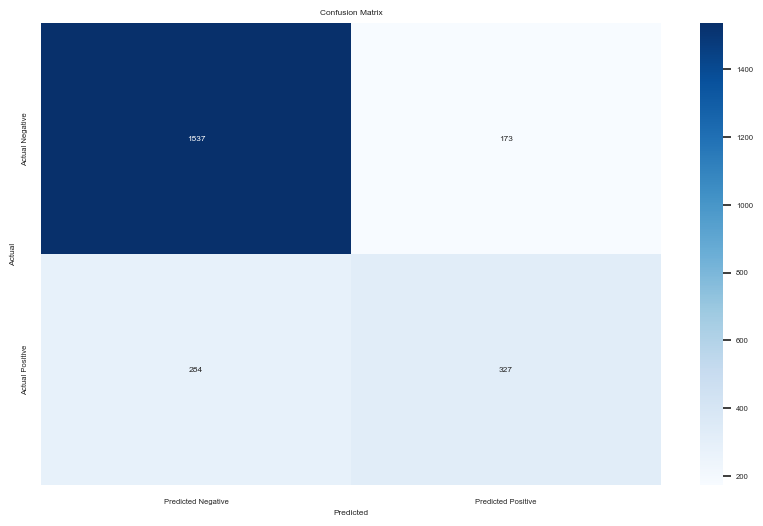

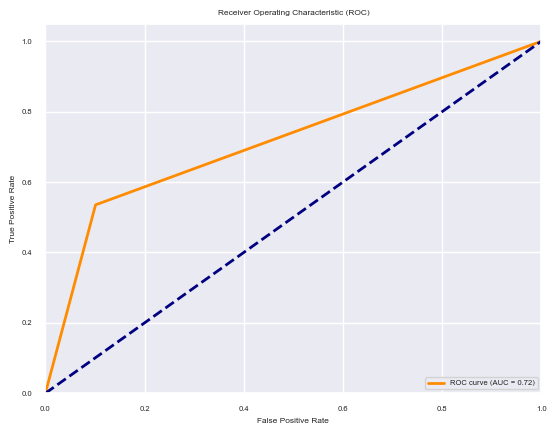

In [ ]:
def train_test_RF(X_train, y_train, X_test, y_test, max_depth, n_estimators):
    modelRF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    modelRF.fit(X_train, y_train)
    y_pred = modelRF.predict(X_test)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print(f"Max Depth: {max_depth}, N Estimators: {n_estimators}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC AUC: {roc_auc}")
    print(confusion)

    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=0.5)
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Create an ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Best hyperparameter values
best_max_depth = 10
best_n_estimators = 20

# Train and test the model with best hyperparameters
train_test_RF(X_train, y_train, X_test, y_test, best_max_depth, best_n_estimators)

## Adaboost

Accuracy: 0.8005170185264971
Precision: 0.6396226415094339
Recall: 0.5548281505728314
F1-Score: 0.5942156003505696
ROC AUC: 0.7215661220700414
Confusion Matrix:
[[1519  191]
 [ 272  339]]


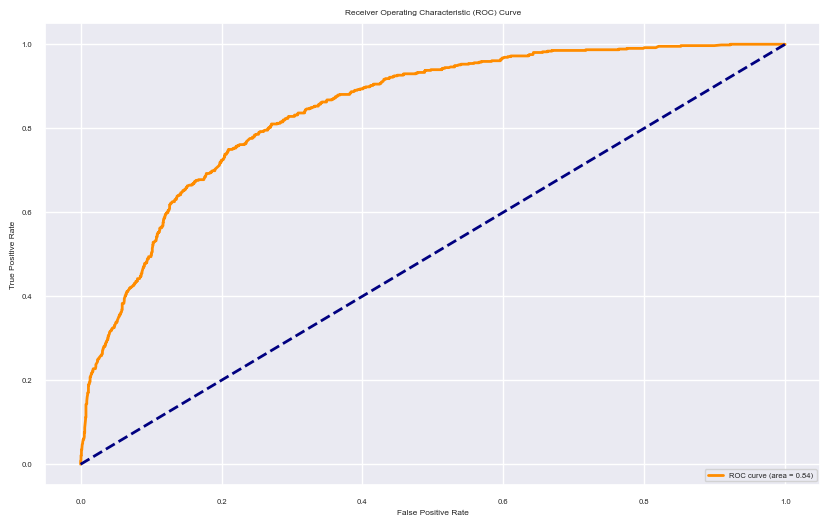

In [ ]:
# modeling using Adaboost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

modelADA = AdaBoostClassifier(n_estimators=50, random_state=42)
modelADA.fit(X_train, y_train)
y_pred = modelADA.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# evalutation metrics for Adaboost
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)

# Calculating ROC curve
y_scores = modelADA.decision_function(X_test)  # AdaBoost uses decision_function for probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 4, 6, 8]
}

class_counts = np.bincount(y_train)
class_weights = {i: sum(class_counts) / (len(class_counts) * count) for i, count in enumerate(class_counts)}


# Initialize the model
churnmodel = GradientBoostingClassifier(random_state=1234)

# Perform cross-validation with Grid Search and custom scoring
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

grid_search = GridSearchCV(churnmodel, param_grid, cv=cv,
                           scoring='roc_auc',
                           verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train, sample_weight=np.vectorize(class_weights.get)(y_train))

best_hyperparameters = grid_search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=150; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=2, n_e

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Best Weighted ROC AUC Score: 0.8437080374267447


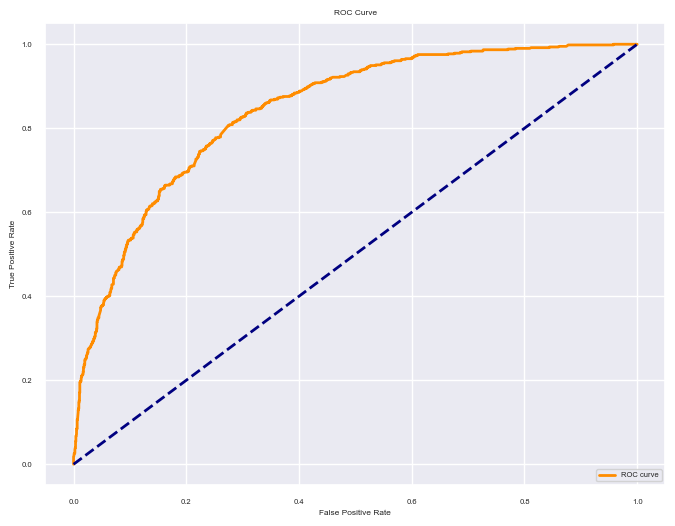

In [ ]:
# Train the model using best hyperparameters
best_gbdt_classifier = GradientBoostingClassifier(**best_hyperparameters, random_state=1234)
best_gbdt_classifier.fit(X_train, y_train)

# Get ROC AUC scores for different thresholds on the best model
y_scores = best_gbdt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Print the best hyperparameters and the best ROC AUC score
print("Best Hyperparameters:", best_hyperparameters)
print("Best Weighted ROC AUC Score:", grid_search.best_score_)

# plot roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Predictions on the test set using the best model
y_pred = best_gbdt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8043946574752262
Precision: 0.6585858585858586
Recall: 0.5335515548281505
F1-Score: 0.5895117540687161
Confusion Matrix:
[[1541  169]
 [ 285  326]]


In [ ]:
# Make predictions on the testing set
predicted_values = best_gbdt_classifier.predict(X_test)
predicted_probabilities = best_gbdt_classifier.predict_proba(X_test)[:, 1]

# Create a new df with the original features, predicted values, and predicted probabilities for the testing split
results_df = X_test.copy()
results_df['Churn'] = y_test
results_df['Predicted'] = predicted_values
results_df['Probability'] = predicted_probabilities

# Create a new column to label the predictions as TP, FP, TN, or FN
results_df['Prediction_Label'] = 'TN'  # Initialize with TN
results_df.loc[(results_df['Churn'] == 1) & (results_df['Predicted'] == 1), 'Prediction_Label'] = 'TP'  # True Positive
results_df.loc[(results_df['Churn'] == 0) & (results_df['Predicted'] == 1), 'Prediction_Label'] = 'FP'  # False Positive
results_df.loc[(results_df['Churn'] == 0) & (results_df['Predicted'] == 0), 'Prediction_Label'] = 'TN'  # True Negative
results_df.loc[(results_df['Churn'] == 1) & (results_df['Predicted'] == 0), 'Prediction_Label'] = 'FN'  # False Negative


In [ ]:
print(predicted_probabilities)

[0.01135559 0.37933339 0.13983968 ... 0.43642512 0.3805126  0.27264375]


In [ ]:
predicted_binary = [1 if prob > 0.5 else 0 for prob in predicted_probabilities]

In [ ]:
# evaluation metrics
accuracy = accuracy_score(y_test, predicted_binary)
precision = precision_score(y_test, predicted_binary)
recall = recall_score(y_test, predicted_binary)
f1 = f1_score(y_test, predicted_binary)
roc_auc = roc_auc_score(y_test, best_gbdt_classifier.predict_proba(X_test)[:, 1])

# confusion matrix
confusion_matrix_10 = confusion_matrix(y_test, predicted_binary)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("ROC AUC Score: {:.2f}".format(roc_auc))
print("Confusion Matrix:\n", confusion_matrix_10)


Accuracy: 0.80
Precision: 0.66
Recall: 0.53
F1 Score: 0.59
ROC AUC Score: 0.84
Confusion Matrix:
 [[1541  169]
 [ 285  326]]


# Customer Churn Analysis

In [ ]:
results_df

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,PaperlessBilling,AutomaticPayment,scaledTotalCharges,ContractType,FamilyTies,Churn,Predicted,Probability,Prediction_Label
233,False,False,72.0,True,False,False,False,False,False,False,...,20.25,False,True,729.301177,True,False,False,False,0.011356,TN
101,False,False,1.0,True,False,False,False,False,False,False,...,19.45,False,False,18.459497,False,True,False,False,0.379333,TN
4696,False,False,59.0,True,False,True,False,False,True,False,...,95.80,False,False,2608.183937,True,False,False,False,0.139840,TN
177,False,True,7.0,True,False,True,True,False,False,False,...,76.45,False,True,240.855989,False,False,True,False,0.423361,FN
1472,True,False,13.0,True,True,True,False,False,False,False,...,74.40,True,True,421.438264,False,True,True,False,0.417566,FN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,True,False,66.0,True,True,True,True,True,True,True,...,91.70,False,True,2801.172629,True,False,False,False,0.048154,TN
1114,True,False,32.0,True,True,True,False,True,False,False,...,98.85,True,True,1454.846757,False,False,False,True,0.547654,FP
4959,False,False,1.0,True,False,False,False,False,False,False,...,20.15,True,True,18.918994,False,True,True,False,0.436425,FN
298,True,False,40.0,True,True,True,False,False,True,False,...,74.55,True,False,1395.112162,False,True,False,False,0.380513,TN


In [ ]:
results_df.shape

(2321, 22)

In [ ]:
# Checking for null values
results_df.isnull().values.any()

False

In [ ]:
# Checking what columns are missing values
nan_countNew = np.sum(results_df.isnull(), axis = 0)
nan_countNew
# Finding indicies with missing row values
bool_df = results_df.isnull()
row_has_nan = bool_df.any (axis=1)
rows_with_nan = results_df[row_has_nan].index
rows_with_nan

Index([], dtype='int64')

# Feature Importance

In [ ]:
# Get feature importances
feature_importances = best_gbdt_classifier.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
               Feature  Importance
16        ContractType    0.406501
2               tenure    0.205555
12      MonthlyCharges    0.203600
5      InternetService    0.082629
15  scaledTotalCharges    0.024958
13    PaperlessBilling    0.017085
6       OnlineSecurity    0.015769
9          TechSupport    0.013779
1        SeniorCitizen    0.010393
11     StreamingMovies    0.005937
3         PhoneService    0.004742
14    AutomaticPayment    0.003117
4        MultipleLines    0.002503
17          FamilyTies    0.001870
10         StreamingTV    0.000782
7         OnlineBackup    0.000488
8     DeviceProtection    0.000293
0               gender    0.000000


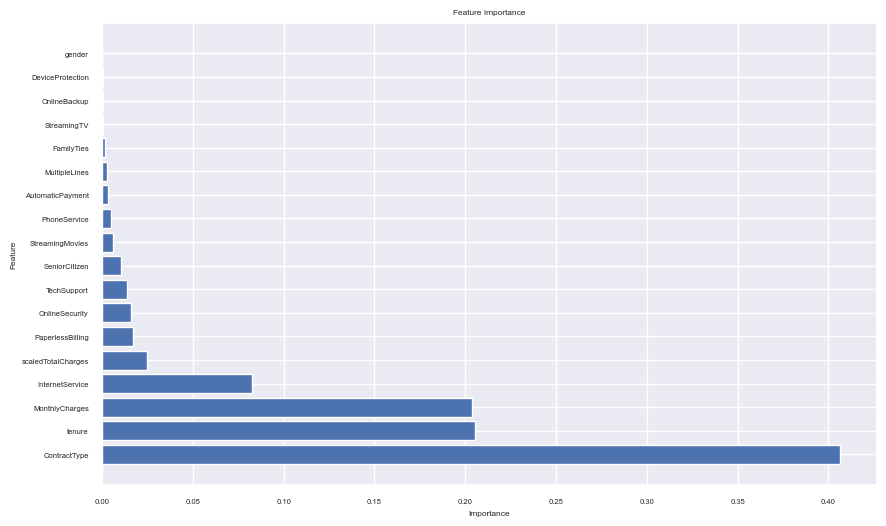

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Plotting ROC Curve...


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

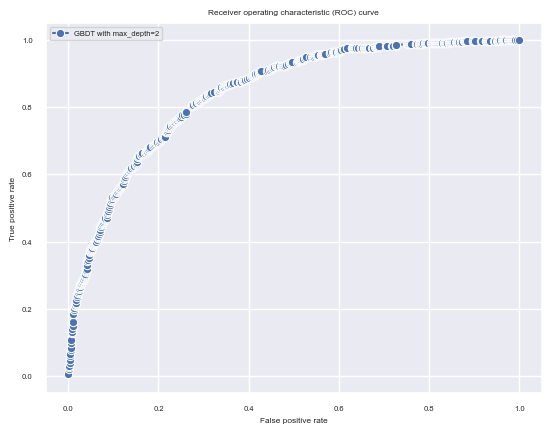

In [ ]:
# data visualization for Gradient Boost
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr, y=tpr, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['GBDT with max_depth=2'])
plt.show()

In [ ]:
auc_ = auc(fpr, tpr)

print("AUC of the GBDT model with a max depth of 6 is {:.3f}".format(auc_))

AUC of the GBDT model with a max depth of 6 is 0.843


In [ ]:
churned_monthly_charges_stats = results_df['MonthlyCharges'].describe()

print(churned_monthly_charges_stats)

count    2321.000000
mean       64.634403
std        30.147548
min        18.750000
25%        35.350000
50%        70.150000
75%        89.900000
max       118.650000
Name: MonthlyCharges, dtype: float64


In [ ]:
Month = df_cleansed['MonthlyCharges'].sum()

Total = df_cleansed['scaledTotalCharges'].sum()

Revenue = Month + Total

Revenue


7903844.796595892

In [ ]:
unique_values = results_df['Prediction_Label'].unique().__array__
value_counts = results_df['Prediction_Label'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x2b00e7c90> Prediction_Label
TN    1541
TP     326
FN     285
FP     169
Name: count, dtype: int64


In [ ]:
churning_customers = results_df[results_df['Prediction_Label'] == "TP"]

churned_monthly_charges_stats = churning_customers['MonthlyCharges'].describe()

print(churned_monthly_charges_stats)

count    326.000000
mean      79.563650
std       18.656235
min       24.250000
25%       72.400000
50%       80.825000
75%       94.050000
max      113.200000
Name: MonthlyCharges, dtype: float64


In [ ]:
Internetsecuritystats = churning_customers["InternetService"]

unique_values = churning_customers['InternetService'].unique().__array__
value_counts = churning_customers['InternetService'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x2a0b8dad0> InternetService
True    326
Name: count, dtype: int64


In [ ]:
# filter new df to include only customers who are churning
churning_customers = results_df[results_df['Prediction_Label'] == "TP"]

# the expected revenue for churning customers
churning_customers['expected_revenue'] = churning_customers['MonthlyCharges'] * 24

# threshold for expected revenue
threshold = 1600

# create new feature 'save_customer' based on the threshold and InternetSecurityLevel condition
churning_customers['savecustomermcis'] = (churning_customers['expected_revenue'] >= threshold) & (churning_customers['InternetService'] == 1) & (churning_customers['PhoneService'] == 1)



print(churning_customers['savecustomermcis'])

2085    True
1731    True
543     True
4960    True
3200    True
        ... 
4417    True
5975    True
507     True
2514    True
6623    True
Name: savecustomermcis, Length: 326, dtype: bool


/var/folders/xg/p3q3yztd1tzgf72581g38x4h0000gn/T/ipykernel_81001/2029749379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churning_customers['expected_revenue'] = churning_customers['MonthlyCharges'] * 24
/var/folders/xg/p3q3yztd1tzgf72581g38x4h0000gn/T/ipykernel_81001/2029749379.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churning_customers['savecustomermcis'] = (churning_customers['expected_revenue'] >= threshold) & (churning_customers['InternetService'] == 1) & (churning_customers['PhoneSe

In [ ]:
unique_values = churning_customers['savecustomermcis'].unique().__array__
value_counts = churning_customers['savecustomermcis'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x2b00e7e10> savecustomermcis
True     284
False     42
Name: count, dtype: int64


In [ ]:
true_save_customers = churning_customers[churning_customers['savecustomermcis']]
true_values_count = len(true_save_customers)
true_values_count

284

In [ ]:
CosttoSave = true_values_count * 800
CosttoSave

227200

In [ ]:


Verizoncustomers = 7022



In [ ]:
CostAnalysis = CosttoSave/Revenue
CostAnalysis

0.028745503719639433

## Customer Segmentation

In [ ]:
# Define the risk categories
high_risk_threshold = 0.7
moderate_risk_threshold_lower = 0.3
moderate_risk_threshold_upper = 0.7
low_risk_threshold = 0.3

# New DataFrame to store customer segments
customer_segments = pd.DataFrame()
customer_segments['customerID'] = X_test.index  # Assuming you have a customer identifier

# Segment customers based on predicted probabilities
customer_segments['ChurnProbability'] = predicted_probabilities
customer_segments['Segment'] = pd.cut(
    customer_segments['ChurnProbability'],
    bins=[0, low_risk_threshold, high_risk_threshold, 1],
    labels=['Low Risk', 'Moderate Risk', 'High Risk'],
    include_lowest=True
)

print(customer_segments)

      customerID  ChurnProbability        Segment
0           4420          0.011808       Low Risk
1           6205          0.146847       Low Risk
2            874          0.044382       Low Risk
3           2683          0.378191  Moderate Risk
4           6588          0.007252       Low Risk
...          ...               ...            ...
2313        3937          0.178152       Low Risk
2314        2227          0.018389       Low Risk
2315        4865          0.030143       Low Risk
2316        2631          0.925843      High Risk
2317        1214          0.505537  Moderate Risk

[2318 rows x 3 columns]


In [ ]:
unique_values = customer_segments['Segment'].unique().__array__
value_counts = customer_segments['Segment'].value_counts()

print(unique_values, value_counts)

<bound method Categorical.__array__ of ['Low Risk', 'Moderate Risk', 'High Risk']
Categories (3, object): ['Low Risk' < 'Moderate Risk' < 'High Risk']> Segment
Low Risk         1564
Moderate Risk     424
High Risk         330
Name: count, dtype: int64
